#Password Strength using NLP

##Importing libraries and dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FB Password dataset/data.csv', error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [ ]:
data.head(5)

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [ ]:
#different strengths present in data
data['strength'].unique()

array([1, 2, 0])

In [ ]:
#any null or na values
data.isna().sum()

password    1
strength    0
dtype: int64

In [ ]:
#checking where the na value exists
data[data['password'].isna()]

,password,strength
367579,NaN,0


In [ ]:
#since only one na value, dropping it and updating the dataframe as well by putting the inplace value as True
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

password    0
strength    0
dtype: int64

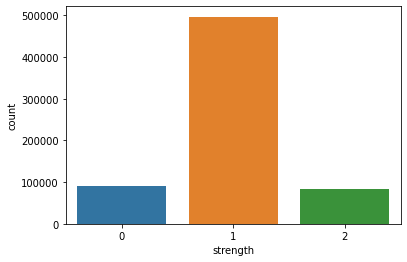

In [ ]:
#plotting different types of strength
sns.countplot(data['strength'])

Since number of '1's is significantly larger than the '0's and '2's therefore the dataset is imbalanced, hence, incorrect results will be achieved.

##Separating independent and dependent features

In [ ]:
#to fetch independent and dependent features easily, converting data into tuple
pass_tuple = np.array(data)

In [ ]:
pass_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [ ]:
#shuffling data to provide robustness to the ML model
import random
random.shuffle(pass_tuple)

In [ ]:
#extracting independent and dependent features
x = [labels[0] for labels in pass_tuple]    #x = independent feature
y = [labels[1] for labels in pass_tuple]    #y = dependent feature

##Applyting TF-IDF on data

In [ ]:
#function to split string to characters

def split_char(inputs):
  char = []
  for i in inputs:
    char.append(i)
  return char

In [ ]:
split_char('hgfjdhgd')

['h', 'g', 'f', 'j', 'd', 'h', 'g', 'd']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=split_char)      #to get the vectored matrix for ML model

In [ ]:
X = vectorizer.fit_transform(x)                         #fitting and transforming the variable x i.e passwords

In [ ]:
X.shape

(669639, 133)

In [ ]:
#Due to vector multiplication the number of columns increased from 2 to 128 as every feature has its own importance
vectorizer.get_feature_names()

['\x02',
 '\x04',
 '\x05',
 '\x06',
 '\x08',
 '\x0e',
 '\x0f',
 '\x10',
 '\x11',
 '\x13',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1d',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x8d',
 '\xa0',
 '¡',
 '¤',
 '¦',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '·',
 'º',
 '¼',
 '¾',
 '¿',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'í',
 'î',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 '—',
 '‚',
 '™']

In [ ]:
first_doc_vector = X[0]
first_doc_vector

<1x133 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
#gives the importance of every data

first_doc_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56698453],
        [0.        ],
        [0.59165834],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [ ]:
#Creating a dataframe for ML model with first column as feature and second column as importance to the corresponding feature

df = pd.DataFrame(first_doc_vector.T.todense(), index = vectorizer.get_feature_names(), columns = ['TF-IDF'])
df.sort_values(by = ['TF-IDF'], ascending=False)

,TF-IDF
7,0.591658
5,0.566985
z,0.336350
k,0.291495
d,0.285452
...,...
8,0.000000
6,0.000000
4,0.000000
3,0.000000


##Applying Logistic Regression

In [ ]:
#splitting the data

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)     #20% data for testing

In [ ]:
X_train.shape   #output is 80% of total x

(535711, 133)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0, multi_class='multinomial')     #multinomial since 0,1 and 2 are 3 types of strenghts

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 2])

##Checking accuracy of the model

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8187458933158115


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.30      0.39     18001
           1       0.84      0.93      0.88     99277
           2       0.82      0.69      0.75     16650

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.68    133928
weighted avg       0.80      0.82      0.80    133928



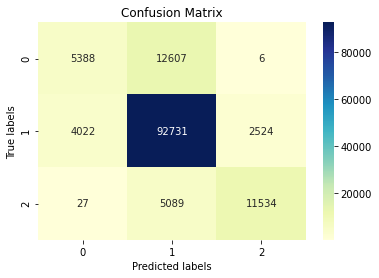

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='YlGnBu');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1', '2']); ax.yaxis.set_ticklabels(['0', '1', '2']);

In [ ]:
TP = cm[0,0]
FP = cm[0,1] + cm[0,2]
FN = cm[1,0] + cm[2,0]
TN = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['0', '1', '2']))


Accuracy: 0.82

Micro Precision: 0.82
Micro Recall: 0.82
Micro F1-score: 0.82

Macro Precision: 0.74
Macro Recall: 0.64
Macro F1-score: 0.68

Weighted Precision: 0.80
Weighted Recall: 0.82
Weighted F1-score: 0.80

Classification Report

              precision    recall  f1-score   support

           0       0.57      0.30      0.39     18001
           1       0.84      0.93      0.88     99277
           2       0.82      0.69      0.75     16650

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.68    133928
weighted avg       0.80      0.82      0.80    133928

